In [1]:
import numpy as np
import matplotlib.pyplot as plt

sizes = list(10**np.linspace(2, 4, num=11)) + [int(size) for size in [10**4.2,10**4.4,10**4.6,50000]]
scales = 10**np.linspace(-1, 1, num=11)

trainss = []
testss = []

for size in sizes:
    trains = []
    tests = []
    for alpha in scales:
        np.loadtxt("./results/trainloss_size_%d_scale_%.4f"%(size, alpha))
        train = np.loadtxt("./results/trainacc_size_%d_scale_%.4f"%(size, alpha))
        np.loadtxt("./results/testloss_size_%d_scale_%.4f"%(size, alpha))
        test = np.loadtxt("./results/testacc_size_%d_scale_%.4f"%(size, alpha))
        trains.append(train)
        tests.append(test)
    trainss.append(trains)
    testss.append(tests)


/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


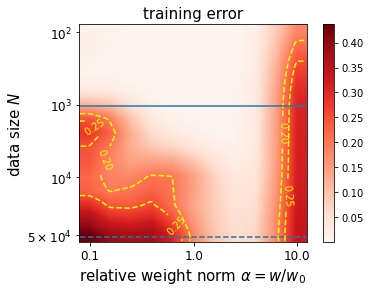

In [2]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors
import torch

#plt.figure(figsize=(20,10))

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**1
        return np.ma.masked_array(f(n(value)))
    
norm = MyNormalize(vmin=0, vmax=0.3)

plot_scale = ps = 10

blur = gaussian_filter(1-np.array(trainss)[:,:], sigma=1)
train_large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()

x = np.arange(11*plot_scale)
y = np.arange(15*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, train_large, [0.2,0.25], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)
#plt.imshow((gaussian_filter(np.array(trainss)[:10,6:12], sigma=1)), cmap='Reds', norm=norm)
#plt.imshow((gaussian_filter(np.array(trainss)[:,:], sigma=1)), cmap='Reds', norm=norm)
plt.imshow(train_large, cmap='Reds', aspect=0.7)


plt.colorbar()
#plt.clim(0,0.5)
plt.xlabel('relative weight norm '+r"$\alpha=w/w_0$", fontsize=15)
plt.ylabel('data size '+r"$N$", fontsize=15)
plt.xticks([0.5*ps,5.5*ps,10.5*ps],[scales[0], scales[5], scales[10]], fontsize=12)
plt.yticks([0.5*ps,5.5*ps,10.5*ps,14.5*ps],[r"$10^2$", r"$10^3$",r"$10^4$",r"$5\times 10^4$"], fontsize=12)
#plt.yticks([0,10],[0,1], rotation=90)

plt.plot([0*ps,10.9*ps],[5.6*ps,5.6*ps], color='#1f77b4')
plt.plot([0*ps,10.9*ps],[14.6*ps,14.6*ps], color='#1f77b4',ls="--")

plt.title("training error", fontsize=15)
plt.savefig("./imdb_train.pdf", bbox_inches="tight")

/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


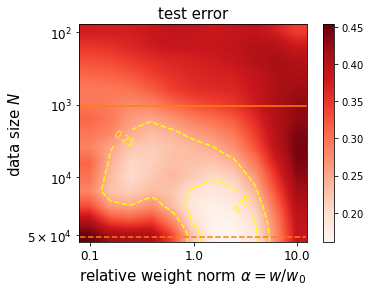

In [3]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors
import torch

#plt.figure(figsize=(20,10))

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x**1
        return np.ma.masked_array(f(n(value)))
    
norm = MyNormalize(vmin=0, vmax=0.3)

plot_scale = ps = 10

blur = gaussian_filter(1-np.array(testss)[:,:], sigma=1)
test_large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()

x = np.arange(11*plot_scale)
y = np.arange(15*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, test_large, [0.2,0.25], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)
#plt.imshow((gaussian_filter(np.array(trainss)[:10,6:12], sigma=1)), cmap='Reds', norm=norm)
#plt.imshow((gaussian_filter(np.array(trainss)[:,:], sigma=1)), cmap='Reds', norm=norm)
plt.imshow(test_large, cmap='Reds', aspect=0.7)


plt.colorbar()
#plt.clim(0,0.25)
plt.xlabel('relative weight norm '+r"$\alpha=w/w_0$", fontsize=15)
plt.ylabel('data size '+r"$N$", fontsize=15)
plt.xticks([0.5*ps,5.5*ps,10.5*ps],[scales[0], scales[5], scales[10]], fontsize=12)
plt.yticks([0.5*ps,5.5*ps,10.5*ps,14.5*ps],[r"$10^2$", r"$10^3$",r"$10^4$",r"$5\times 10^4$"], fontsize=12)
#plt.yticks([0,10],[0,1], rotation=90)

plt.plot([0*ps,10.9*ps],[5.6*ps,5.6*ps], color='#ff7f0e')
plt.plot([0*ps,10.9*ps],[14.6*ps,14.6*ps], color='#ff7f0e', ls="--")

plt.title("test error", fontsize=15)
plt.savefig("./imdb_test.pdf", bbox_inches="tight")

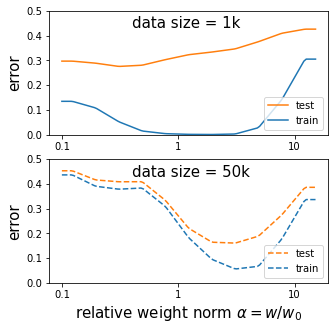

In [4]:
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)

plt.plot(test_large[int(5.6*ps)], color='#ff7f0e')
plt.plot(train_large[int(5.6*ps)], color='#1f77b4')
plt.xticks(np.arange(0,11,5)*ps, [0.1,1,10])
plt.ylabel("error", fontsize=15)
plt.legend(["test", "train"], loc="lower right")
plt.text(3*ps, 0.43, "data size = 1k", fontsize=15)
plt.ylim(0,0.5)

plt.subplot(2,1,2)

plt.plot(test_large[int(14.6*ps)], color='#ff7f0e', ls="--")
plt.plot(train_large[int(14.6*ps)], color='#1f77b4', ls="--")
plt.xticks(np.arange(0,11,5)*ps, [0.1,1,10])
plt.ylabel("error", fontsize=15)
plt.legend(["test","train"], loc="lower right")
plt.text(3*ps, 0.43, "data size = 50k", fontsize=15)
plt.ylim(0,0.5)


plt.xlabel("relative weight norm "+r"$\alpha=w/w_0$", fontsize=15)

plt.savefig('./imdb_LU_UU.pdf', bbox_inches="tight")